### LEEFI Fire pulse analysis

In [13]:
import os
import pandas as pd
import numpy as np
#from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

In [2]:
# read CSV
csv1 = pd.read_csv('FTSA Fire Pulse.csv')

In [3]:
time = csv1['Time'].values
time = time.astype(float)
voltage = csv1['Voltage'].values
voltage = voltage.astype(float)

In [4]:
print('number of points in the data set: {:,d}'.format(len(voltage)))
print('peak voltage: {:.3f}'.format(voltage.max()))

number of points in the data set: 100,000
peak voltage: 11.200


### Find the offset voltage.
From the peak time t, find the averge from t-300 to t-200.

In [5]:
peak_index = voltage.argmax()
start = peak_index-300
end = peak_index-200
x = time[start:end]
y = voltage[start:end]
offset= y.mean()
print('voltage offset: {:.3f} volts'.format(offset))

voltage offset: 0.280 volts


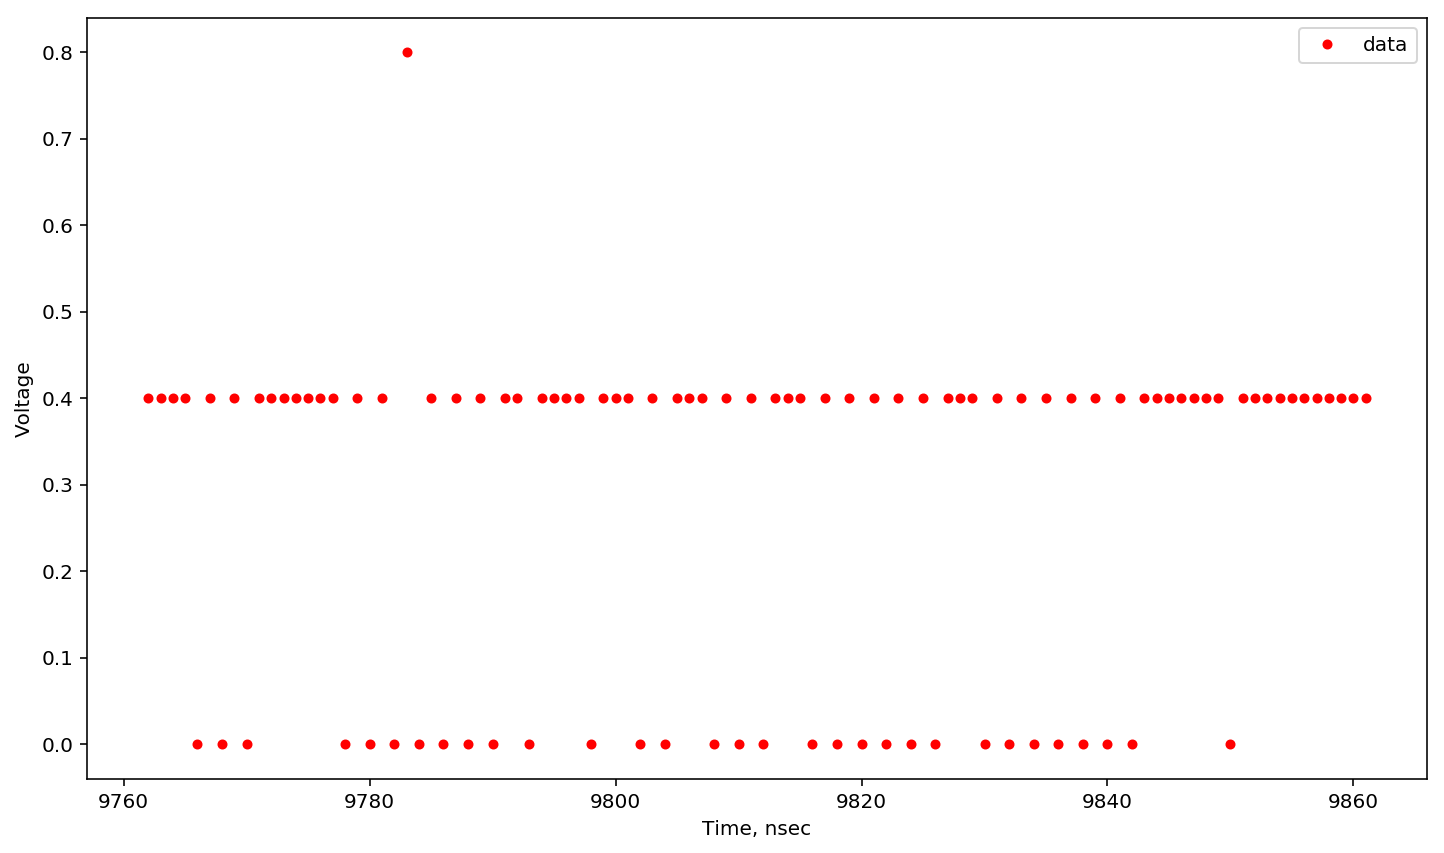

In [6]:
# plot base line data, pre pulse, with offset
plt.plot(x,y,'ro', markersize=4)
plt.xlabel('Time, nsec')
plt.ylabel('Voltage')
plt.legend(['data'], loc='best')
plt.show()

In [7]:
start = peak_index-200
end = peak_index+700
x = time[start:end]
y = voltage[start:end]
y -= offset  #remove the offset

A [Savitzky–Golay](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter) filter is a digital filter that can be applied to a set of digital data points for the purpose of smoothing the data, that is, to increase the signal-to-noise ratio without greatly distorting the signal. This is achieved, in a process known as convolution, by fitting successive sub-sets of adjacent data points with a low-degree polynomial by the method of linear least squares. When the data points are equally spaced, an analytical solution to the least-squares equations can be found, in the form of a single set of "convolution coefficients" that can be applied to all data sub-sets, to give estimates of the smoothed signal, (or derivatives of the smoothed signal) at the central point of each sub-set. The method, based on established mathematical procedures, was popularized by Abraham Savitzky and Marcel J. E. Golay who published tables of convolution coefficients for various polynomials and sub-set sizes in 1964.

In [8]:
ynew = savgol_filter(y, 51, 3)  # filter the data

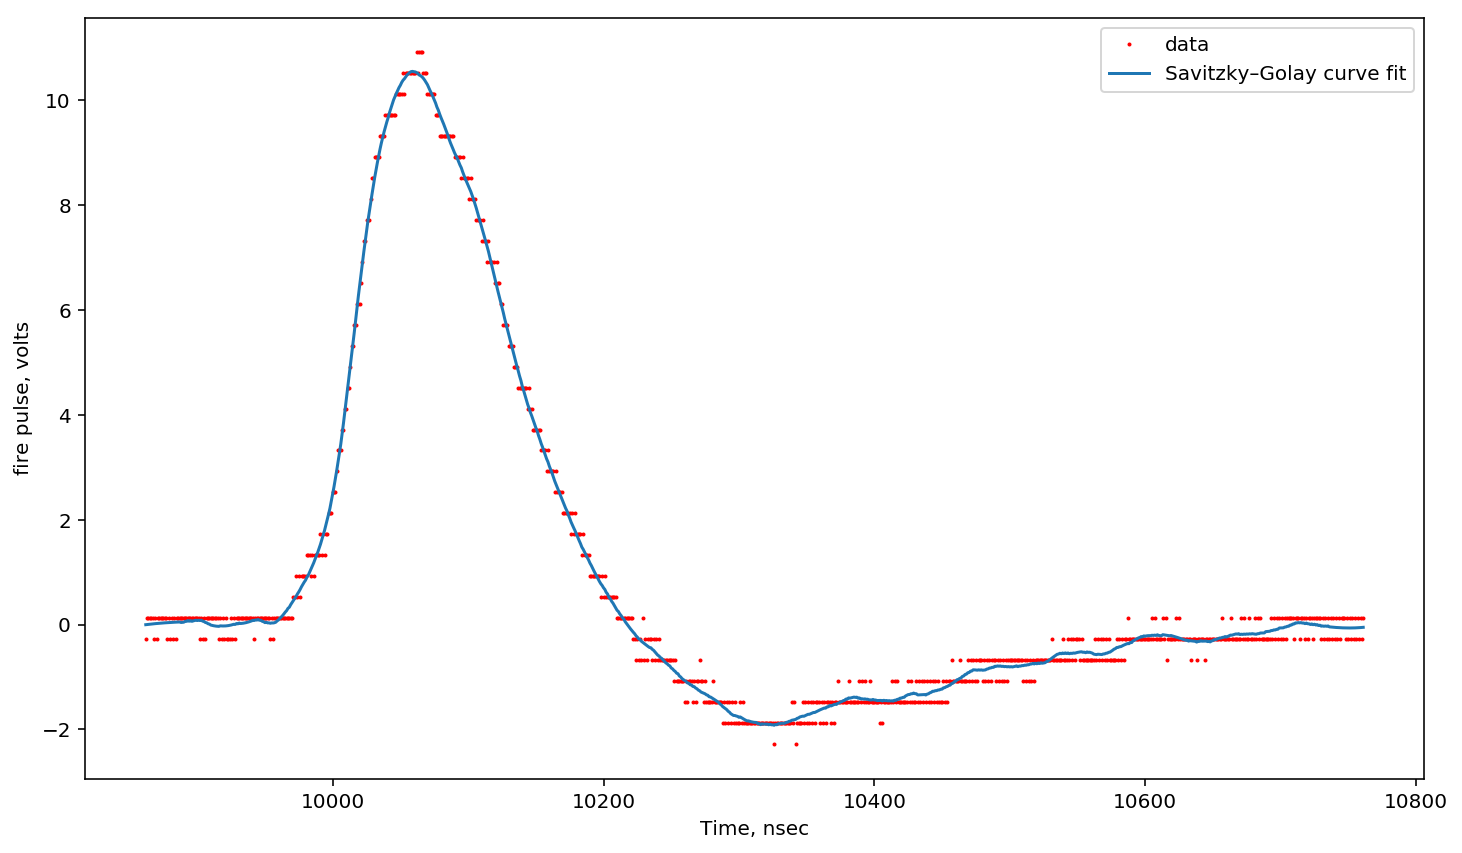

In [9]:
# plot the fire pulse
plt.plot(x,y,'ro', markersize=1)
plt.plot(x,ynew)
plt.xlabel('Time, nsec')
plt.ylabel('fire pulse, volts')
plt.legend(['data','Savitzky–Golay curve fit'], loc='best')
plt.show()

### find the following:
1. peak voltage
2. average pre pulse voltage level
3. index of 90% of peak
4. find 10% index
5. calculate rise time
6. calculate peak current

In [10]:
peak = y.max()
peak_index = y.argmax()+5
print('peak voltage: {:.3f}'.format(peak))
print('index of peak: {:.3f}'.format(peak_index))

peak voltage: 10.920
index of peak: 205.000


#### limit data set to index of peak

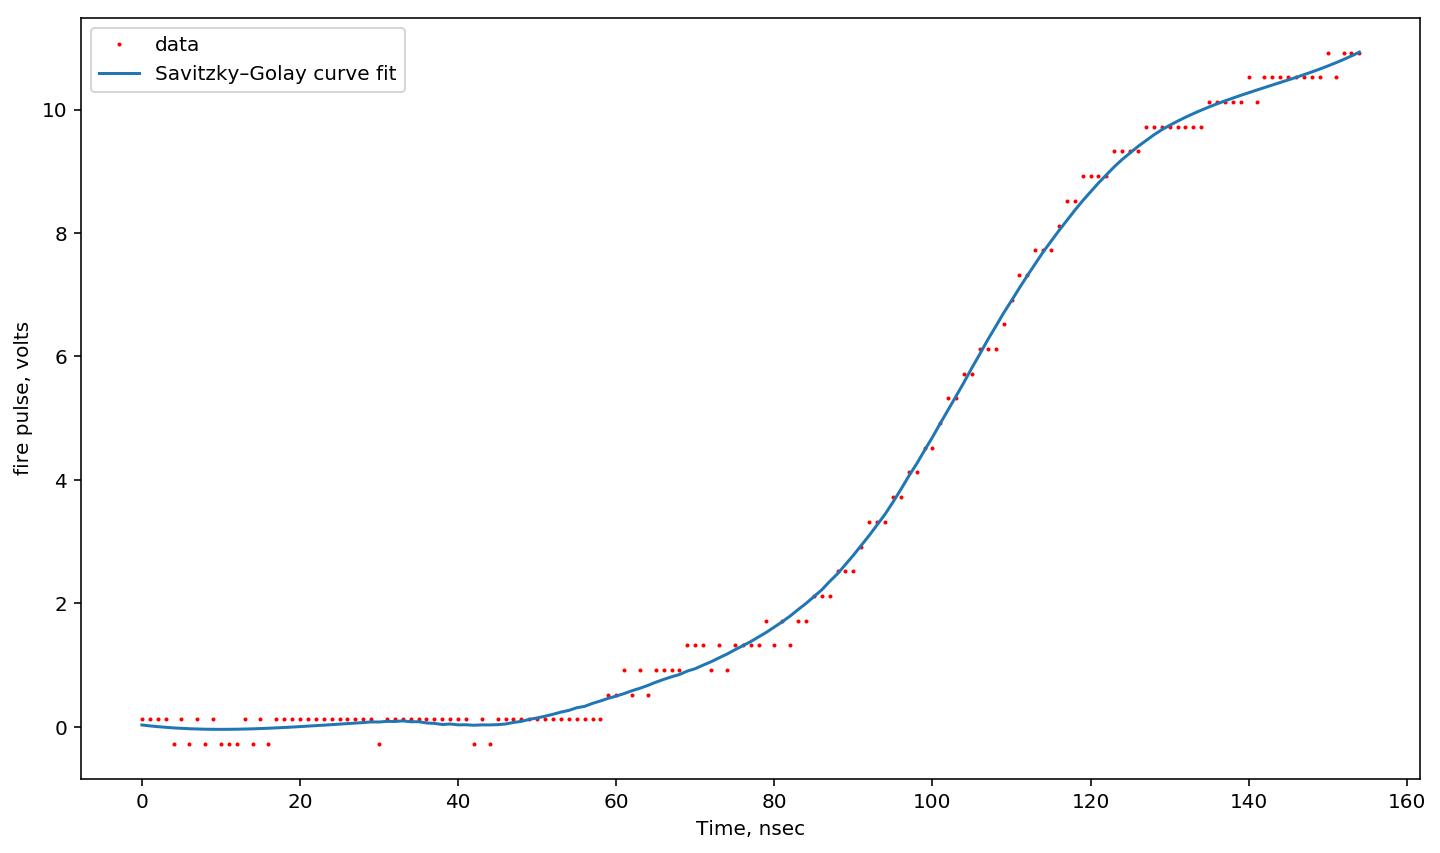

In [11]:
x1 = x[50:peak_index]-x[50]
y1 = y[50:peak_index]

# plot the fire pulse
y1new = savgol_filter(y1, 51, 3)
plt.plot(x1,y1,'ro', markersize=1)
plt.plot(x1,y1new)
plt.xlabel('Time, nsec')
plt.ylabel('fire pulse, volts')
plt.legend(['data','Savitzky–Golay curve fit'], loc='best')
plt.show()

#### find rise time

In [14]:
index_90pc = (np.abs(y1new-y1new.max()*0.9)).argmin()
index_10pc = (np.abs(y1new-y1new.max()*0.1)).argmin()
rise_time = x1[index_90pc]-x1[index_10pc]

print('peak voltage value: {:.3f} volts'.format(y1new.max()))
print('90% voltage value: {:.3f} volts at {:.0f} ns'.format(y1new[index_90pc], x1[index_90pc]))
print('10% voltage value: {:.3f} volts at {:.0f} ns'.format(y1new[index_10pc], x1[index_10pc]))
print('rise time: {:.0f} ns'.format(rise_time))

peak voltage value: 10.930 volts
90% voltage value: 9.811 volts at 131 ns
10% voltage value: 1.116 volts at 73 ns
rise time: 58 ns


#### plot the 90% and 10% data points

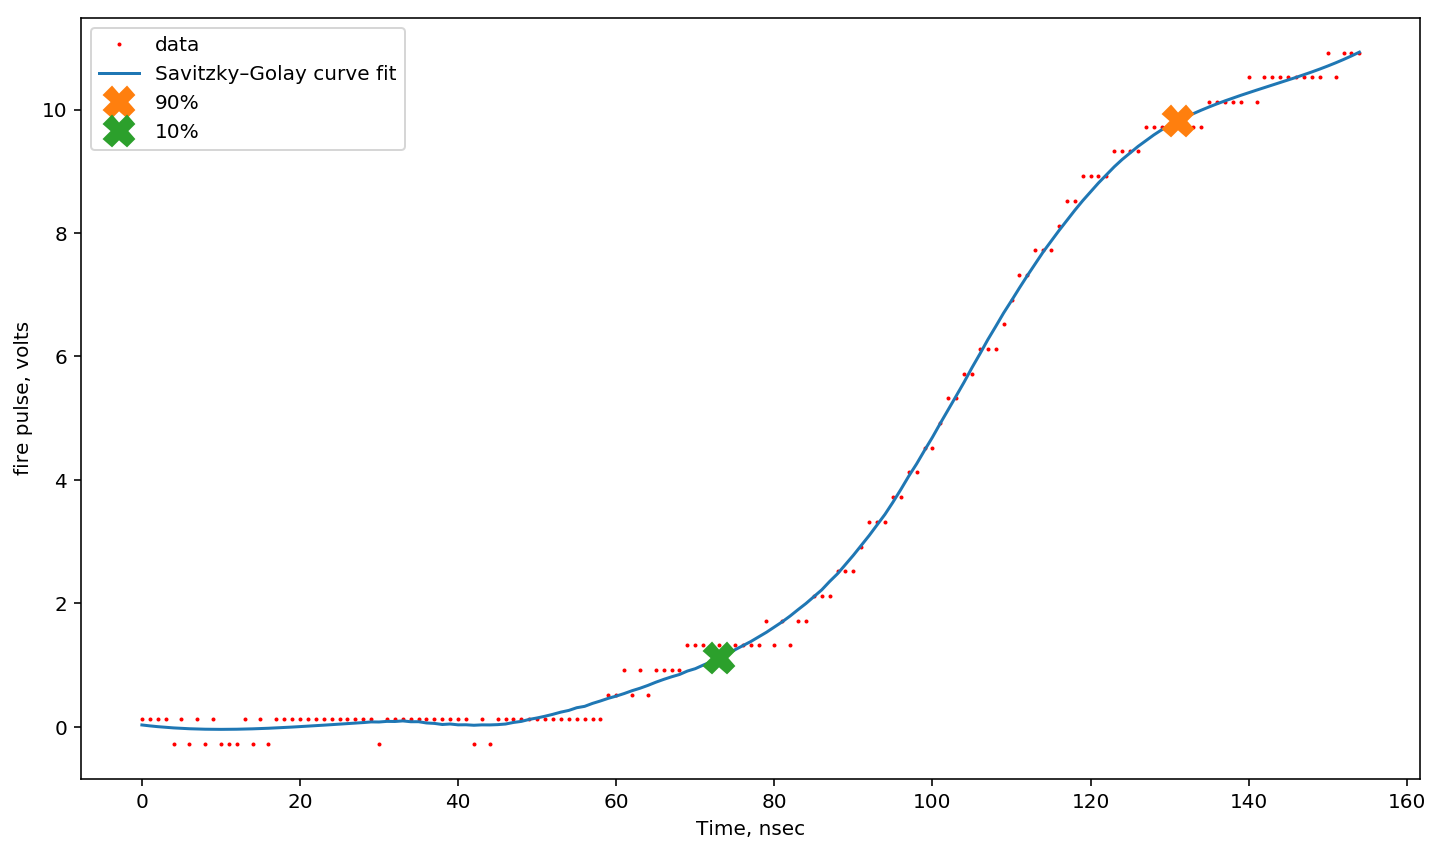

In [15]:
# plot the fire pulse
plt.plot(x1,y1,'ro', markersize=1)
plt.plot(x1,y1new)
plt.plot(x1[index_90pc],y1new[index_90pc],'X',markersize=15)  # 90% point
plt.plot(x1[index_10pc],y1new[index_10pc],'X',markersize=15)  # 10% point
plt.xlabel('Time, nsec')
plt.ylabel('fire pulse, volts')
plt.legend(['data','Savitzky–Golay curve fit','90%','10%'], loc='best')
plt.show()

CVR: R1 = 0.5143, R2 = 0.004907

In [19]:
R1 = 0.5143
R2 = 0.004907
print('peak current: {:,.0f} amps'.format(peak/R2))
print('peak voltage across the CVR: {:,.0f} volts'.format((R1+R2)*peak/R2))

peak current: 2,225 amps
peak voltage across the CVR: 1,155 volts
